In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import glob
import re 
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
import pandas as pd
import os
import torch
import torchvision.transforms as transforms
from torchvision import models

import torch.nn as nn
import torch.optim as optim
import torchvision
from sklearn.metrics import classification_report
from sklearn import preprocessing
import datetime

# data load


In [ ]:
transform_train = transforms.Compose([
     transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

transform_valid = transforms.Compose([
     transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])


train_data_dir = 'drive/MyDrive/sprit_data/train'
valid_data_dir = 'drive/MyDrive/sprit_data/validation'

# training set
trainset = torchvision.datasets.ImageFolder(train_data_dir, transform=transform_train)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

# validation set
validset = torchvision.datasets.ImageFolder(valid_data_dir, transform=transform_valid)
valid_loader = torch.utils.data.DataLoader(validset, batch_size=32, shuffle=False)

# Network 定義

In [ ]:
#net = models.vgg16(pretrained=False)
net = models.Resnet50(pretrained=False)
#4class分類
net.fc = nn.Linear(512,4)

In [ ]:
device=torch.device('cuda')
net.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# 学習

In [ ]:
#loss,accuracyを格納
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

nb_epoch = 100

for epoch in range(nb_epoch):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0

    #train
    net.train()
    for i, (data, labels) in enumerate(train_loader):
      
      data, labels = data.to(device), labels.to(device)

      optimizer.zero_grad()
      outputs = net(data)
      loss = criterion(outputs, labels)
      train_loss += loss.item()
      train_acc += (outputs.max(1)[1] == labels).sum().item()
      loss.backward()
      optimizer.step()

    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_acc / len(train_loader.dataset)

    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    print ('Epoch [{}/{}], loss: {loss:.4f} train_loss: {train_loss:.4f}, train_acc: {train_acc:.4f}' 
                   .format(epoch+1, nb_epoch, i+1, loss=avg_train_loss, train_loss=avg_train_loss, train_acc=avg_train_acc))
    #val
    net.eval()
    with torch.no_grad():
     for data, labels in valid_loader:
      data = data.to(device)
      labels = labels.to(device)
      outputs = net(data)
      loss = criterion(outputs, labels)
      val_loss += loss.item()
      val_acc += (outputs.max(1)[1] == labels).sum().item()
    avg_val_loss = val_loss / len(valid_loader.dataset)
    avg_val_acc = val_acc / len(valid_loader.dataset)

    print ('Epoch [{}/{}], loss: {loss:.4f} val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}' 
                   .format(epoch+1, nb_epoch, i+1, loss=avg_train_loss, val_loss=avg_val_loss, val_acc=avg_val_acc))
    
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)

Epoch [1/32], loss: 0.2220 train_loss: 0.2220, train_acc: 0.2101
Epoch [1/32], loss: 0.2220 val_loss: 0.2275, val_acc: 0.2241
Epoch [2/32], loss: 0.1949 train_loss: 0.1949, train_acc: 0.1729
Epoch [2/32], loss: 0.1949 val_loss: 0.0886, val_acc: 0.1897
Epoch [3/32], loss: 0.0671 train_loss: 0.0671, train_acc: 0.2691
Epoch [3/32], loss: 0.0671 val_loss: 0.0630, val_acc: 0.3966
Epoch [4/32], loss: 0.0498 train_loss: 0.0498, train_acc: 0.3239
Epoch [4/32], loss: 0.0498 val_loss: 0.0570, val_acc: 0.3966
Epoch [5/32], loss: 0.0466 train_loss: 0.0466, train_acc: 0.3304
Epoch [5/32], loss: 0.0466 val_loss: 0.0486, val_acc: 0.3966
Epoch [6/32], loss: 0.0458 train_loss: 0.0458, train_acc: 0.3676
Epoch [6/32], loss: 0.0458 val_loss: 0.0471, val_acc: 0.3966
Epoch [7/32], loss: 0.0457 train_loss: 0.0457, train_acc: 0.3764
Epoch [7/32], loss: 0.0457 val_loss: 0.0476, val_acc: 0.3966
Epoch [8/32], loss: 0.0468 train_loss: 0.0468, train_acc: 0.3501
Epoch [8/32], loss: 0.0468 val_loss: 0.0500, val_acc:

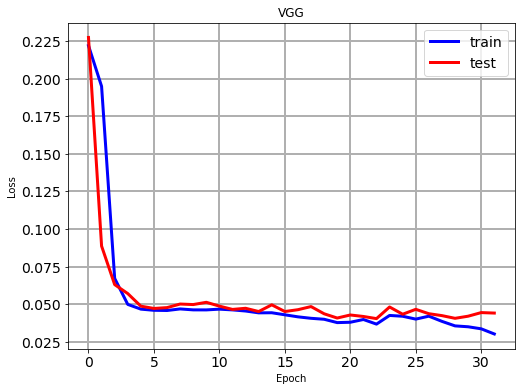

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(train_loss_list,label='train', lw=3, c='b')
plt.plot(val_loss_list,label='test',lw=3,c = 'r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('VGG')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()

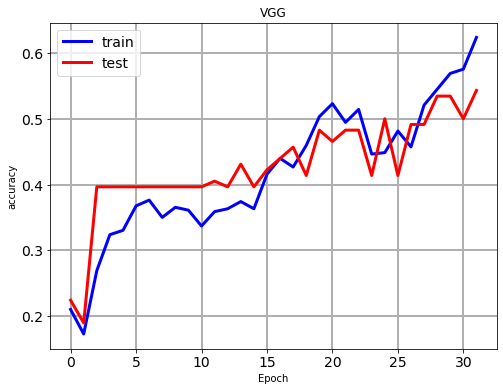

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(train_acc_list,label='train', lw=3, c='b')
plt.plot(val_acc_list,label='test',lw=3,c = 'r')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('VGG')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()